<a href="https://colab.research.google.com/github/Munniz1309/prev_bitcoin_RNN/blob/main/prev_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import yfinance as yf

In [2]:
!pip install tensorflow

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - loss: 0.0065 - val_loss: 0.0013
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 4.5920e-04 - val_loss: 0.0011
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 3.7063e-04 - val_loss: 6.9635e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 3.0645e-04 - val_loss: 6.4637e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 2.6240e-04 - val_loss: 6.5435e-04
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 2.2360e-04 - val_loss: 8.2347e-04
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 1.9373e-04 - val_loss: 3.8995e-04
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 1.7448e-04 - val_loss: 3.9153e-04
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 1.5446e-04 - val_loss: 0.0011
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 2.3560e-04 - val_loss: 5.4429e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


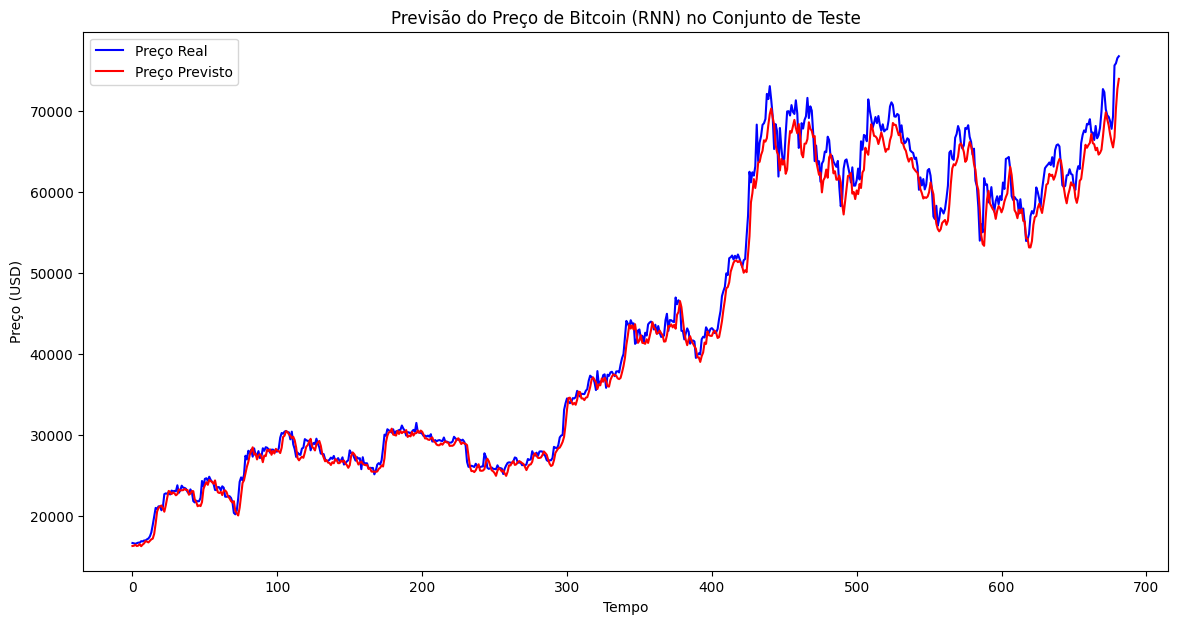

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

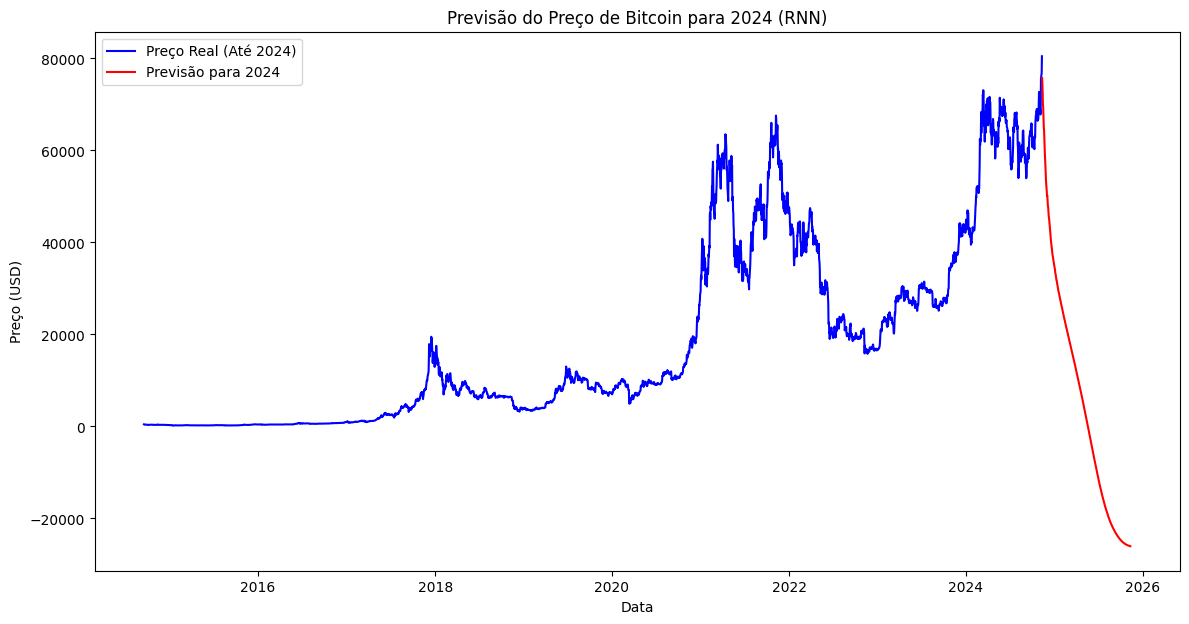

In [3]:
# Usando o Yahoo Finance para baixar os dados históricos do Bitcoin (BTC-USD)
data = yf.download('BTC-USD', start='2014-01-01', end='2024-11-11')

# Pré-processamento de dados
data = data[['Close']]

# Normalização dos dados para melhorar a performance da rede
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Função para criar os dados de entrada e saída
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Definir o número de passos de tempo
time_step = 300

# Criar os dados de treino e teste
X, y = create_dataset(data_scaled, time_step)

# Dividir os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Redimensionar para ser compatível com o formato da RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construir a rede neural RNN
model = Sequential()

# Adicionar a camada RNN
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Adicionar a camada de saída
model.add(Dense(units=1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliação e Previsões no conjunto de teste
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Inverter a normalização dos dados reais
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizar os resultados do conjunto de teste
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Preço Real')
plt.plot(predicted_price, color='red', label='Preço Previsto')
plt.title('Previsão do Preço de Bitcoin (RNN) no Conjunto de Teste')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# Previsão do preço do Bitcoin para os próximos 365 dias
last_sequence = data_scaled[-time_step:]  # Últimos 300 dias de dados como sequência inicial
predictions_365_days = []

for _ in range(365):  # Prever para os próximos 365 dias (1 ano)
    input_sequence = last_sequence.reshape(1, time_step, 1)
    predicted_value = model.predict(input_sequence)[0, 0]
    predictions_365_days.append(predicted_value)
    last_sequence = np.append(last_sequence[1:], predicted_value)  # Atualizar a sequência com a previsão

# Inverter a normalização das previsões para obter os valores reais
predictions_365_days = scaler.inverse_transform(np.array(predictions_365_days).reshape(-1, 1))

# Gerar as datas para o ano de 2024
dates_2024 = pd.date_range(start="2024-11-11", periods=365, freq='D')

# Combinar as previsões de 2024 com os dados reais até 2024
historical_dates = data.index  # Data até janeiro de 2024
full_dates = historical_dates.append(dates_2024)  # Data completa com as previsões de 2024

# Visualizar o gráfico combinando os preços reais e previstos (para 2024)
plt.figure(figsize=(14, 7))
plt.plot(historical_dates, data['Close'], color='blue', label='Preço Real (Até 2024)')
plt.plot(dates_2024, predictions_365_days, color='red', label='Previsão para 2024')
plt.title('Previsão do Preço de Bitcoin para 2024 (RNN)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()